In [ ]:
from google.colab import files

# This will prompt you to upload the CSV file from your local machine
uploaded = files.upload()

In [ ]:
import pandas as pd

df = pd.read_csv('world_bank_common_indicators.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Austria,AUT,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.537979,2.648675,4.138268,6.124354,3.480175,...,1.303523,2.117220,2.272250,2.484221,1.754976,-6.318255,4.795329,5.277894,-0.954962,NaN
1,Austria,AUT,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,4.960717,2.021470,3.471466,5.419336,2.810013,...,0.174260,1.018877,1.564307,1.986263,1.303503,-6.706394,4.339759,4.275933,-1.930146,NaN
2,Austria,AUT,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,43.085313,42.789627,42.290354,42.129181,41.980126,...,32.942923,32.357853,32.169413,32.147722,32.128090,31.539813,31.537668,31.476584,NaN,NaN
3,Austria,AUT,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,12.70,12.100000,12.700000,12.800000,12.300000,13.000000,...,9.600000,9.200000,9.500000,9.500000,9.400000,10.300000,10.300000,10.300000,9.800000,NaN
4,Austria,AUT,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.69,2.780000,2.800000,2.820000,2.790000,2.700000,...,1.490000,1.530000,1.520000,1.470000,1.460000,1.440000,1.480000,1.410000,1.320000,NaN


In [ ]:
df.shape

(620, 69)

In [ ]:
countries = df['Country Name'].unique()
print(f"Total unique countries: {len(countries)}")
print(countries)

Total unique countries: 31
['Austria' 'Australia' 'Bangladesh' 'Bhutan' 'Brazil' 'Canada' 'Ecuador'
 'Estonia' 'France' 'Germany' 'India' 'Ireland' 'Japan' 'Korea, Rep.'
 'Maldives' 'Malaysia' 'Nepal' 'Norway' 'Pakistan' 'Poland' 'Portugal'
 'Sri Lanka' 'Singapore' 'South Africa' 'Switzerland' 'Sweden' 'Turkiye'
 'Ukraine' 'United States' 'United Kingdom' 'Zimbabwe']


In [ ]:
indicators = df['Series Name'].unique()
print(f"Total unique indicators: {len(indicators)}\n")
print(indicators)

Total unique indicators: 20

['GDP growth (annual %)' 'GDP per capita growth (annual %)'
 'Agricultural land (% of land area)'
 'Death rate, crude (per 1,000 people)'
 'Fertility rate, total (births per woman)' 'GDP (current US$)'
 'GDP per capita, PPP (current international $)'
 'GDP per capita (current US$)' 'Net migration'
 'Scientific and technical journal articles'
 'Life expectancy at birth, total (years)'
 'Life expectancy at birth, female (years)'
 'Life expectancy at birth, male (years)'
 'Mortality rate, adult, female (per 1,000 female adults)'
 'Mortality rate, adult, male (per 1,000 male adults)'
 'Population growth (annual %)' 'Population, total' 'Population, male'
 'Population, female' 'GDP, PPP (current international $)']


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('world_bank_common_indicators.csv')

# Melt the year columns
df_melted = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    var_name='Year',
    value_name='Value'
)

# Clean the year column to remove "[YRxxxx]"
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)

df_melted.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Austria,AUT,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
1,Austria,AUT,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,1960,NaN
2,Austria,AUT,Agricultural land (% of land area),AG.LND.AGRI.ZS,1960,NaN
3,Austria,AUT,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,12.70
4,Austria,AUT,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.69


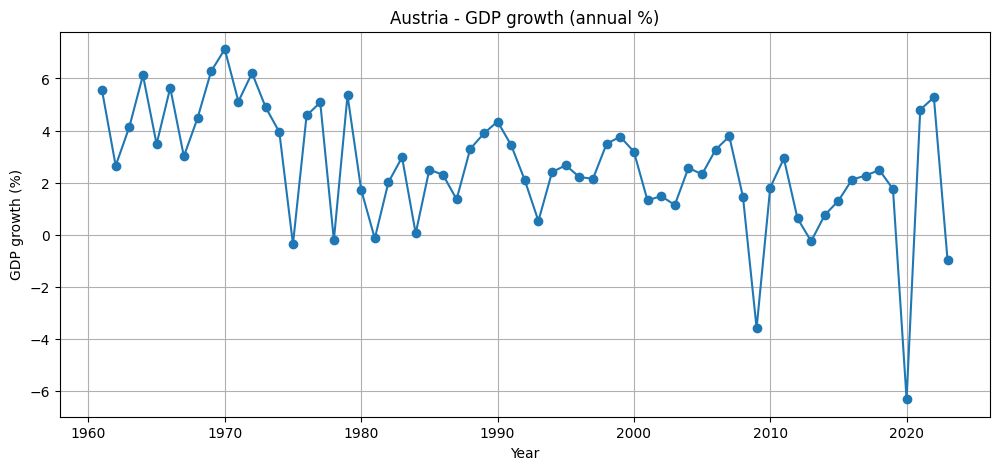

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter Austria + 'GDP growth (annual %)'
country = 'Austria'
indicator = 'GDP growth (annual %)'

austria_gdp = df_melted[(df_melted['Country Name'] == country) &
                        (df_melted['Series Name'] == indicator)].dropna()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(austria_gdp['Year'], austria_gdp['Value'], marker='o')
plt.title(f"{country} - {indicator}")
plt.xlabel('Year')
plt.ylabel('GDP growth (%)')
plt.grid(True)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00


<Figure size 1200x500 with 0 Axes>

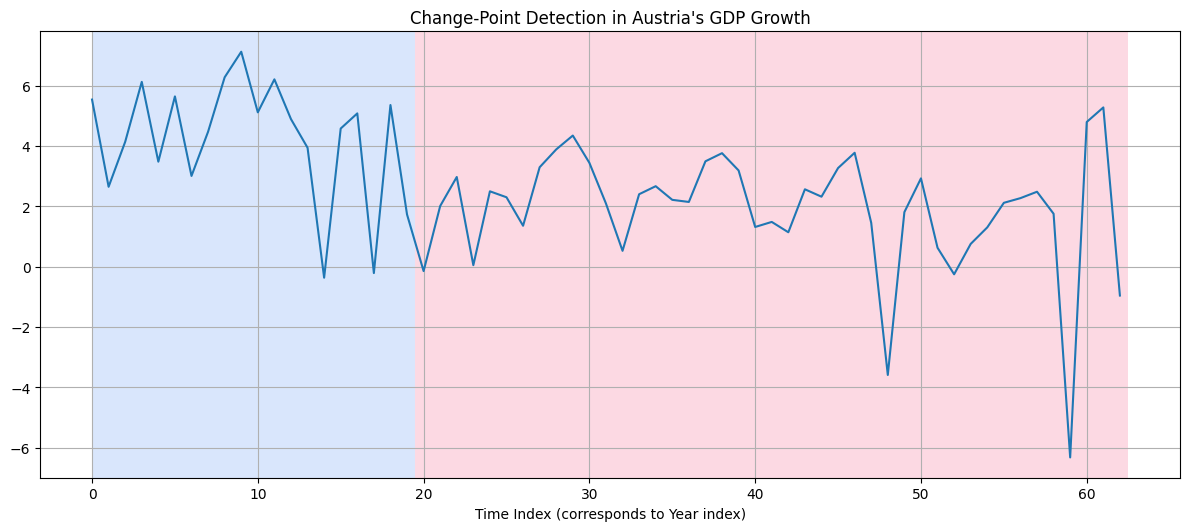

Detected change-point years: [1980]


In [ ]:
!pip install ruptures

import ruptures as rpt
import numpy as np

# Prepare the data (reshaped for ruptures)
signal = austria_gdp['Value'].values.reshape(-1, 1)

# Change Point Detection using Pelt + RBF cost
model = rpt.Pelt(model="rbf").fit(signal)
change_points = model.predict(pen=5)

# Plot the results
plt.figure(figsize=(12, 5))
rpt.display(signal, change_points, figsize=(12, 5))
plt.title("Change-Point Detection in Austria's GDP Growth")
plt.xlabel("Time Index (corresponds to Year index)")
plt.grid(True)
plt.show()

# Print the corresponding years of change points
change_years = austria_gdp.iloc[[cp - 1 for cp in change_points if cp < len(austria_gdp)]]['Year'].values
print("Detected change-point years:", change_years)

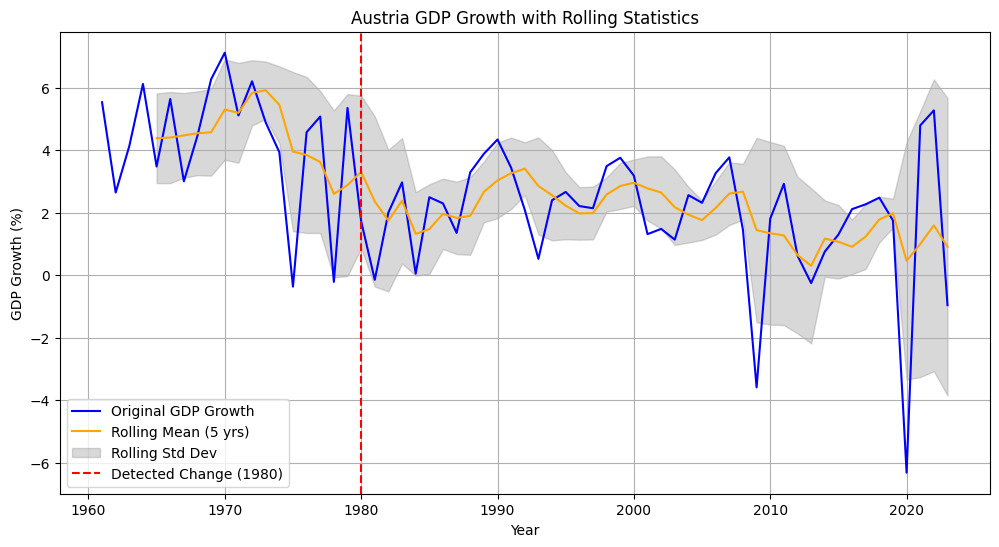

In [ ]:
import matplotlib.pyplot as plt

# Define rolling window size (e.g., 5 years)
window_size = 5

# Calculate rolling mean and std
rolling_mean = austria_gdp['Value'].rolling(window=window_size).mean()
rolling_std = austria_gdp['Value'].rolling(window=window_size).std()

# Plot original data with rolling stats
plt.figure(figsize=(12, 6))
plt.plot(austria_gdp['Year'], austria_gdp['Value'], label='Original GDP Growth', color='blue')
plt.plot(austria_gdp['Year'], rolling_mean, label='Rolling Mean (5 yrs)', color='orange')
plt.fill_between(austria_gdp['Year'],
                 rolling_mean - rolling_std,
                 rolling_mean + rolling_std,
                 color='gray', alpha=0.3, label='Rolling Std Dev')
plt.axvline(x=1980, color='red', linestyle='--', label='Detected Change (1980)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('Austria GDP Growth with Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np

def detect_change_points(df, country, indicator, model='l2', penalty=10, plot=True):
    """
    Applies change-point detection on a specific country and indicator.

    Parameters:
        df (DataFrame): Melted and cleaned dataframe.
        country (str): Country Name.
        indicator (str): Indicator to analyze.
        model (str): Model type for ruptures (default: 'l2').
        penalty (int): Penalty value for change-point detection.
        plot (bool): If True, plot the signal and change points.

    Returns:
        List of detected change point years.
    """
    # Filter data for the given country and indicator
    country_data = df[(df['Country Name'] == country) & (df['Series Name'] == indicator)].dropna()

    if country_data.empty:
        print(f"No data found for {country} - {indicator}")
        return []

    signal = country_data['Value'].values.reshape(-1, 1)
    years = country_data['Year'].values

    # Apply change-point detection
    algo = rpt.Pelt(model=model).fit(signal)
    result = algo.predict(pen=penalty)

    # Map detected indices to years (exclude last point)
    change_years = [years[i] for i in result[:-1]]

    # Plot
    if plot:
        rpt.display(signal, result, figsize=(10, 4))
        plt.title(f"Change-Point Detection: {country} - {indicator}")
        plt.xlabel("Year")
        plt.ylabel("Value")
        plt.xticks(ticks=np.arange(0, len(years), step=5), labels=years[::5], rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return change_years

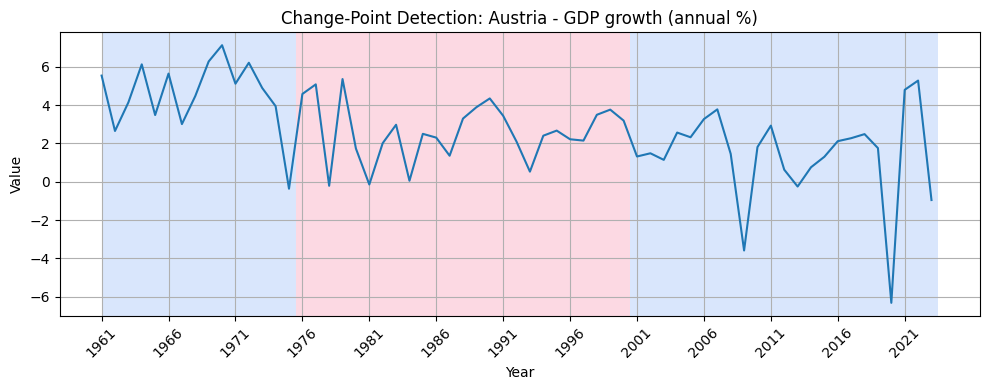

Detected change years for Austria: [np.int64(1976), np.int64(2001)]


In [ ]:
change_years = detect_change_points(df_melted, "Austria", "GDP growth (annual %)")
print("Detected change years for Austria:", change_years)

In [ ]:
# List of all countries
countries = [
    'Austria', 'Australia', 'Bangladesh', 'Bhutan', 'Brazil', 'Canada', 'Ecuador',
    'Estonia', 'France', 'Germany', 'India', 'Ireland', 'Japan', 'Korea, Rep.',
    'Maldives', 'Malaysia', 'Nepal', 'Norway', 'Pakistan', 'Poland', 'Portugal',
    'Sri Lanka', 'Singapore', 'South Africa', 'Switzerland', 'Sweden', 'Turkiye',
    'Ukraine', 'United States', 'United Kingdom', 'Zimbabwe'
]

# Dictionary to store change-point years for each country
all_change_years = {}

# Loop through all countries and apply change-point detection
for country in countries:
    print(f"Processing {country}...")
    years = detect_change_points(df_melted, country, "GDP growth (annual %)", plot=False)
    all_change_years[country] = years

# Display result
import pprint
pprint.pprint(all_change_years)

Processing Austria...
Processing Australia...
Processing Bangladesh...
Processing Bhutan...
Processing Brazil...
Processing Canada...
Processing Ecuador...
Processing Estonia...
Processing France...
Processing Germany...
Processing India...
Processing Ireland...
Processing Japan...
Processing Korea, Rep....
Processing Maldives...
Processing Malaysia...
Processing Nepal...
Processing Norway...
Processing Pakistan...
Processing Poland...
Processing Portugal...
Processing Sri Lanka...
Processing Singapore...
Processing South Africa...
Processing Switzerland...
Processing Sweden...
Processing Turkiye...
Processing Ukraine...
Processing United States...
Processing United Kingdom...
Processing Zimbabwe...
{'Australia': [np.int64(1971)],
 'Austria': [np.int64(1976), np.int64(2001)],
 'Bangladesh': [np.int64(1971), np.int64(1976), np.int64(2006)],
 'Bhutan': [np.int64(1976),
            np.int64(1986),
            np.int64(1991),
            np.int64(2001),
            np.int64(2011),
        

In [ ]:
import pandas as pd

# Your result dictionary
change_points_dict = {
    'Australia': [np.int64(1971)],
    'Austria': [np.int64(1976), np.int64(2001)],
    'Bangladesh': [np.int64(1971), np.int64(1976), np.int64(2006)],
    'Bhutan': [np.int64(1976), np.int64(1986), np.int64(1991), np.int64(2001),
               np.int64(2011), np.int64(2016), np.int64(2021)],
    'Brazil': [np.int64(1966), np.int64(1976), np.int64(1981), np.int64(2006),
               np.int64(2011), np.int64(2021)],
    'Canada': [np.int64(1981), np.int64(2006), np.int64(2021)],
    'Ecuador': [np.int64(1971), np.int64(1976), np.int64(1981), np.int64(2001),
                np.int64(2016), np.int64(2021)],
    'Estonia': [np.int64(1996), np.int64(2006), np.int64(2011)],
    'France': [np.int64(1971), np.int64(1981), np.int64(2006), np.int64(2021)],
    'Germany': [np.int64(1971), np.int64(2001)],
    'India': [np.int64(1981), np.int64(1996), np.int64(2016), np.int64(2021)],
    'Ireland': [np.int64(1996), np.int64(2001), np.int64(2006), np.int64(2011)],
    'Japan': [np.int64(1971), np.int64(1991)],
    'Korea, Rep.': [np.int64(1966), np.int64(1971), np.int64(1996), np.int64(2011)],
    'Malaysia': [np.int64(1971), np.int64(1981), np.int64(1991), np.int64(1996)],
    'Maldives': [np.int64(1976), np.int64(1981), np.int64(1986), np.int64(1991),
                 np.int64(2001), np.int64(2006), np.int64(2016), np.int64(2021)],
    'Nepal': [np.int64(1981)],
    'Norway': [np.int64(1986), np.int64(1991), np.int64(2001)],
    'Pakistan': [np.int64(1971), np.int64(1976), np.int64(1991)],
    'Poland': [np.int64(1996), np.int64(2001)],
    'Portugal': [np.int64(1971), np.int64(1981), np.int64(1986), np.int64(1991),
                 np.int64(1996), np.int64(2001), np.int64(2021)],
    'Singapore': [np.int64(1966), np.int64(1971), np.int64(1996), np.int64(2016), np.int64(2021)],
    'South Africa': [np.int64(1971), np.int64(1981), np.int64(1996), np.int64(2016), np.int64(2021)],
    'Sri Lanka': [np.int64(2002), np.int64(2017), np.int64(2022)],
    'Sweden': [np.int64(1971)],
    'Switzerland': [np.int64(1971)],
    'Turkiye': [np.int64(1976), np.int64(1981), np.int64(1991),
                np.int64(2011), np.int64(2016), np.int64(2021)],
    'Ukraine': [np.int64(1993), np.int64(1998), np.int64(2003),
                np.int64(2008), np.int64(2013)],
    'United Kingdom': [np.int64(2006), np.int64(2016), np.int64(2021)],
    'United States': [np.int64(1966), np.int64(2006), np.int64(2021)],
    'Zimbabwe': [np.int64(1966), np.int64(1971), np.int64(1976), np.int64(1981),
                 np.int64(1991), np.int64(2001), np.int64(2006), np.int64(2011),
                 np.int64(2016), np.int64(2021)]
}

# Convert dictionary to DataFrame
df_cp = pd.DataFrame.from_dict(change_points_dict, orient='index')

# Rename columns for readability
df_cp.columns = [f'CP{i+1}' for i in range(df_cp.shape[1])]

# Display neatly
print(df_cp.to_string())

                 CP1     CP2     CP3     CP4     CP5     CP6     CP7     CP8     CP9    CP10
Australia       1971     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
Austria         1976  2001.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
Bangladesh      1971  1976.0  2006.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
Bhutan          1976  1986.0  1991.0  2001.0  2011.0  2016.0  2021.0     NaN     NaN     NaN
Brazil          1966  1976.0  1981.0  2006.0  2011.0  2021.0     NaN     NaN     NaN     NaN
Canada          1981  2006.0  2021.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
Ecuador         1971  1976.0  1981.0  2001.0  2016.0  2021.0     NaN     NaN     NaN     NaN
Estonia         1996  2006.0  2011.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
France          1971  1981.0  2006.0  2021.0     NaN     NaN     NaN     NaN     NaN     NaN
Germany         1971  2001.0     NaN     NaN     NaN     NaN     NaN  

In [ ]:
# Step 1: Convert all np.int64 change years to regular Python ints
all_change_years_cleaned = {
    country: [int(year) for year in years]
    for country, years in all_change_years.items()
}

In [ ]:
df_cp['Count'] = df_cp.notna().sum(axis=1)
top_countries = df_cp['Count'].sort_values(ascending=False)
print(top_countries)

Zimbabwe          10
Maldives           8
Bhutan             7
Portugal           7
Turkiye            6
Brazil             6
Ecuador            6
Ukraine            5
South Africa       5
Singapore          5
Malaysia           4
Ireland            4
Korea, Rep.        4
India              4
France             4
United Kingdom     3
United States      3
Pakistan           3
Sri Lanka          3
Bangladesh         3
Canada             3
Estonia            3
Norway             3
Poland             2
Japan              2
Austria            2
Germany            2
Australia          1
Nepal              1
Switzerland        1
Sweden             1
Name: Count, dtype: int64


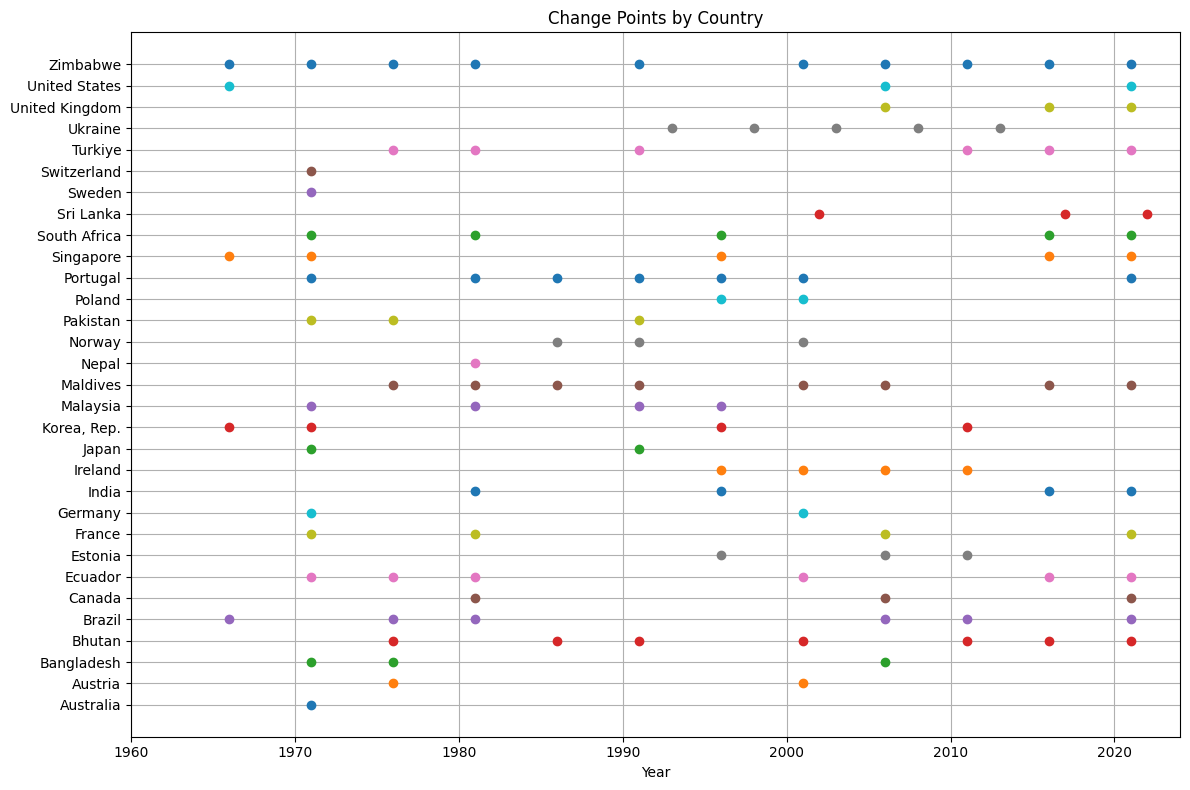

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for idx, (country, row) in enumerate(df_cp.iterrows()):
    cps = [int(float(x)) for x in row.dropna()]  # Ensure years are integers
    plt.plot(cps, [idx] * len(cps), 'o', label=country)

plt.yticks(range(len(df_cp)), df_cp.index)
plt.xlabel("Year")
plt.title("Change Points by Country")
plt.grid(True)
plt.xlim(1960, 2024)  # Force x-axis range
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Change Points')

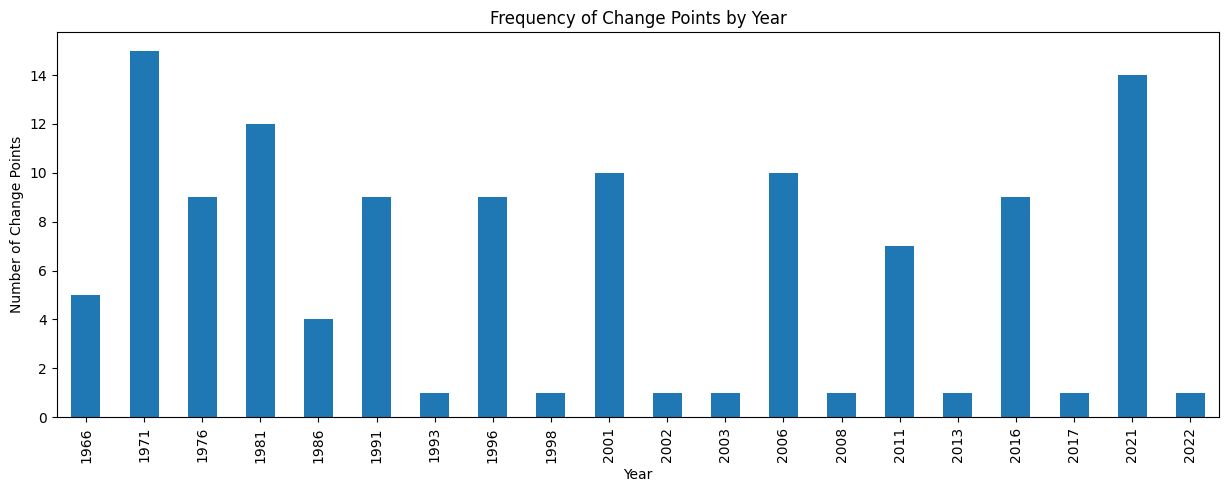

In [ ]:
cp_years = pd.Series([year for sublist in change_points_dict.values() for year in sublist])
year_counts = cp_years.value_counts().sort_index()

year_counts.plot(kind='bar', figsize=(15, 5), title='Frequency of Change Points by Year')
plt.xlabel("Year")
plt.ylabel("Number of Change Points")

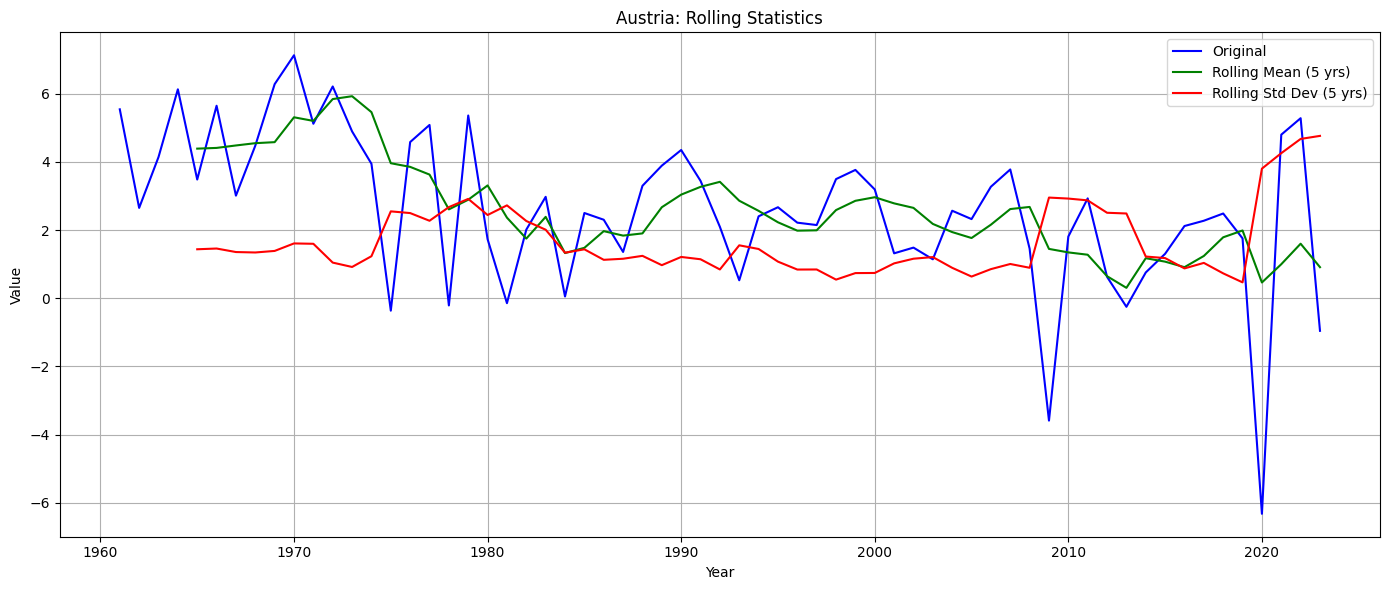

In [ ]:
country = 'Austria'

# Get the time series data again (already cleaned before)
austria_row = df[df['Country Name'] == country]
austria_ts = austria_row.iloc[0, 4:]
austria_ts.index = austria_ts.index.str.extract(r'(\d{4})')[0].astype(int)
austria_ts = pd.to_numeric(austria_ts, errors='coerce').dropna()

# Apply rolling mean and std with window of 5 years
rolling_mean = austria_ts.rolling(window=5).mean()
rolling_std = austria_ts.rolling(window=5).std()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(austria_ts.index, austria_ts.values, label='Original', color='blue')
plt.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean (5 yrs)', color='green')
plt.plot(rolling_std.index, rolling_std.values, label='Rolling Std Dev (5 yrs)', color='red')
plt.title('Austria: Rolling Statistics')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train: years 1960–2010
train_df = df_melted[df_melted['Year'] <= 2010]

# Test: years 2011–2024
test_df = df_melted[df_melted['Year'] > 2010]

# Confirm the split
print(f"Train years: {train_df['Year'].min()}–{train_df['Year'].max()}")
print(f"Test years: {test_df['Year'].min()}–{test_df['Year'].max()}")

Train years: 1960–2010
Test years: 2011–2024


In [ ]:
# List of selected indicators
indicators = [
    'GDP growth (annual %)',
    'GDP per capita growth (annual %)',
    'Agricultural land (% of land area)',
    'Death rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'GDP (current US$)',
    'GDP per capita, PPP (current international $)',
    'GDP per capita (current US$)',
    'Net migration',
    'Scientific and technical journal articles',
    'Life expectancy at birth, total (years)',
    'Life expectancy at birth, female (years)',
    'Life expectancy at birth, male (years)',
    'Mortality rate, adult, female (per 1,000 female adults)',
    'Mortality rate, adult, male (per 1,000 male adults)',
    'Population growth (annual %)',
    'Population, total',
    'Population, male',
    'Population, female',
    'GDP, PPP (current international $)'
]

# Filter for Austria and selected indicators
austria_df = df_melted[
    (df_melted['Country Name'] == 'Austria') &
    (df_melted['Series Name'].isin(indicators))
]

# Pivot to get years as rows and indicators as columns
austria_pivot = austria_df.pivot(index='Year', columns='Series Name', values='Value').sort_index()

# Display the first few rows
austria_pivot.head()

Series Name,Agricultural land (% of land area),"Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (current international $)","GDP, PPP (current international $)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)",Net migration,Population growth (annual %),"Population, female","Population, male","Population, total",Scientific and technical journal articles
Year,,,,,,,,,,,,,,,,,,,,
1960,NaN,12.7,2.69,6.624086e+09,NaN,939.914815,NaN,NaN,NaN,71.92,65.41,68.585610,118.001,215.261,-1732.0,NaN,3764891.0,3282648.0,7047539.0,NaN
1961,43.085313,12.1,2.78,7.346566e+09,5.537979,1036.728204,4.960717,NaN,NaN,72.84,66.47,69.577317,113.020,205.943,-2760.0,0.548472,3783504.0,3302795.0,7086299.0,NaN
1962,42.789627,12.7,2.80,7.793043e+09,2.648675,1093.014191,2.021470,NaN,NaN,72.48,66.29,69.309512,113.132,206.366,1509.0,0.612896,3804071.0,3325793.0,7129864.0,NaN
1963,42.290354,12.8,2.82,8.414051e+09,4.138268,1172.557446,3.471466,NaN,NaN,72.65,66.39,69.443659,112.710,201.301,4774.0,0.642363,3825240.0,3350571.0,7175811.0,NaN
1964,42.129181,12.3,2.79,9.213649e+09,6.124354,1275.457153,5.419336,NaN,NaN,73.20,66.80,69.921951,108.820,199.678,3646.0,0.666548,3847021.0,3376780.0,7223801.0,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Split into train and test
train = austria_pivot[austria_pivot.index <= 2010]
test = austria_pivot[austria_pivot.index > 2010]

# Initialize the scaler and fit only on the training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

# Apply the same transformation to test data
test_scaled = scaler.transform(test)

# Convert back to DataFrame
train_scaled_df = pd.DataFrame(train_scaled, index=train.index, columns=train.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test.index, columns=test.columns)

# Preview the scaled train data
train_scaled_df.head()

Series Name,Agricultural land (% of land area),"Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (current international $)","GDP, PPP (current international $)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)",Net migration,Population growth (annual %),"Population, female","Population, male","Population, total",Scientific and technical journal articles
Year,,,,,,,,,,,,,,,,,,,,
1960,NaN,0.860465,0.912752,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.221511,NaN,0.000000,0.000000,0.000000,NaN
1961,1.000000,0.720930,0.973154,0.001710,0.852005,0.001912,0.831061,NaN,NaN,0.079447,0.085553,0.082678,0.928137,0.919425,0.211400,0.595804,0.035376,0.025512,0.029456,NaN
1962,0.968565,0.860465,0.986577,0.002766,0.582207,0.003023,0.553457,NaN,NaN,0.048359,0.071025,0.060351,0.929752,0.923083,0.253388,0.642971,0.074466,0.054633,0.062563,NaN
1963,0.915486,0.883721,1.000000,0.004235,0.721303,0.004594,0.690405,NaN,NaN,0.063040,0.079096,0.071535,0.923664,0.879285,0.285502,0.664544,0.114700,0.086009,0.097481,NaN
1964,0.898351,0.767442,0.979866,0.006128,0.906760,0.006626,0.874376,NaN,NaN,0.110535,0.112187,0.111409,0.867541,0.865250,0.274407,0.682251,0.156097,0.119197,0.133951,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Split into train and test
train = austria_pivot[austria_pivot.index <= 2010]
test = austria_pivot[austria_pivot.index > 2010]

# Separate features and target
target_column = 'GDP (current US$)'

# === Step 1: Scale only the features ===
feature_columns = train.columns.drop(target_column)

feature_scaler = MinMaxScaler()
train_features_scaled = feature_scaler.fit_transform(train[feature_columns])
test_features_scaled = feature_scaler.transform(test[feature_columns])

# === Step 2: Scale only the target ===
target_scaler = MinMaxScaler()
train_target_scaled = target_scaler.fit_transform(train[[target_column]])
test_target_scaled = target_scaler.transform(test[[target_column]])

# Convert back to DataFrames
train_scaled_df = pd.DataFrame(train_features_scaled, index=train.index, columns=feature_columns)
test_scaled_df = pd.DataFrame(test_features_scaled, index=test.index, columns=feature_columns)

train_scaled_df[target_column] = train_target_scaled
test_scaled_df[target_column] = test_target_scaled

In [ ]:
import numpy as np

def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)
        y.append(data.iloc[i + window_size].values)
    return np.array(X), np.array(y)


# Create train and test sequences
window_size = 10
X_train, y_train = create_sequences(train_scaled_df, window_size)
X_test, y_test = create_sequences(test_scaled_df, window_size)

# Confirm shapes
print(f"Train shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test shape: X={X_test.shape}, y={y_test.shape}")

Train shape: X=(41, 10, 20), y=(41, 20)
Test shape: X=(4, 10, 20), y=(4, 20)


In [ ]:
import numpy as np

# Impute X_train NaNs with feature-wise mean
X_train_imputed = X_train.copy()
for i in range(X_train.shape[1]):
    for j in range(X_train.shape[2]):
        col = X_train[:, i, j]
        mean_val = np.nanmean(col)
        col[np.isnan(col)] = mean_val
        X_train_imputed[:, i, j] = col

# Impute y_train NaNs with feature-wise mean
y_train_imputed = y_train.copy()
for j in range(y_train.shape[1]):
    col = y_train[:, j]
    mean_val = np.nanmean(col)
    col[np.isnan(col)] = mean_val
    y_train_imputed[:, j] = col

# Print confirmation
print("Cleaned X_train shape:", X_train_imputed.shape)
print("Cleaned y_train shape:", y_train_imputed.shape)
print("Remaining NaNs in X_train:", np.isnan(X_train_imputed).sum())
print("Remaining NaNs in y_train:", np.isnan(y_train_imputed).sum())

Cleaned X_train shape: (41, 10, 20)
Cleaned y_train shape: (41, 20)
Remaining NaNs in X_train: 0
Remaining NaNs in y_train: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential([
    LSTM(64, input_shape=(10, 20), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(20)  # Output layer matches y_train shape
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,220 (106.33 KB)

 Trainable params: 27,220 (106.33 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.2016 - val_loss: 0.4118
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1614 - val_loss: 0.3344
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1146 - val_loss: 0.2660
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0834 - val_loss: 0.2095
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0625 - val_loss: 0.1644
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0439 - val_loss: 0.1356
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0310 - val_loss: 0.1189
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0234 - val_loss: 0.1161
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0247 - val_loss: 0.1124
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0214 - val_loss: 0.1012
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0200 - val_loss: 0.0885
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0172 - val_loss: 0.0839